# Crimes by source of information
Figure 9 of our article presents the time series of violent crimes in Bogotá from different sources. In that graph we showed for each month of 2018 the number of crimes reported in NUSE, SIEDCO, and the sum of both sources, having previously eliminated each of the duplicate reports. 

With this script, we built that chart

## 0. Import packages and data

In [14]:
# Beginning of code

# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import data
unique_crimes = pd.read_csv('../../Data/unique_crimes.csv', sep = ";")
violent_nuse = pd.read_csv('../../Data/violent_nuse.csv', sep = ";")
violent_siedco = pd.read_csv('../../Data/violent_siedco.csv', sep = ";")

## 1. Aggregate crimes by year-month and source

In [9]:
# Validate formats
unique_crimes.FECHA = pd.to_datetime(unique_crimes.FECHA)
violent_nuse.FECHA = pd.to_datetime(violent_nuse.FECHA)
violent_siedco.FECHA = pd.to_datetime(violent_siedco.FECHA)

# Create Year-Month column
unique_crimes["Año-Mes"] = unique_crimes.FECHA.dt.strftime('%Y-%m')
violent_nuse["Año-Mes"] = violent_nuse.FECHA.dt.strftime('%Y-%m')
violent_siedco["Año-Mes"] = violent_siedco.FECHA.dt.strftime('%Y-%m')

In [12]:
# Groupby year-month and source
total_crime = unique_crimes.groupby(["Año-Mes"]).size().reset_index(name = "N").assign(BASE = "Total") 
total_nuse = violent_nuse.groupby(["Año-Mes"]).size().reset_index(name = "N").assign(BASE = "NUSE")
total_siedco = violent_siedco.groupby(["Año-Mes"]).size().reset_index(name = "N").assign(BASE = "SIEDCO")

In [19]:
# Append the three sources of information
total = pd.concat([total_crime, total_nuse, total_siedco]).reset_index(drop = True)

## 3. Make the plot

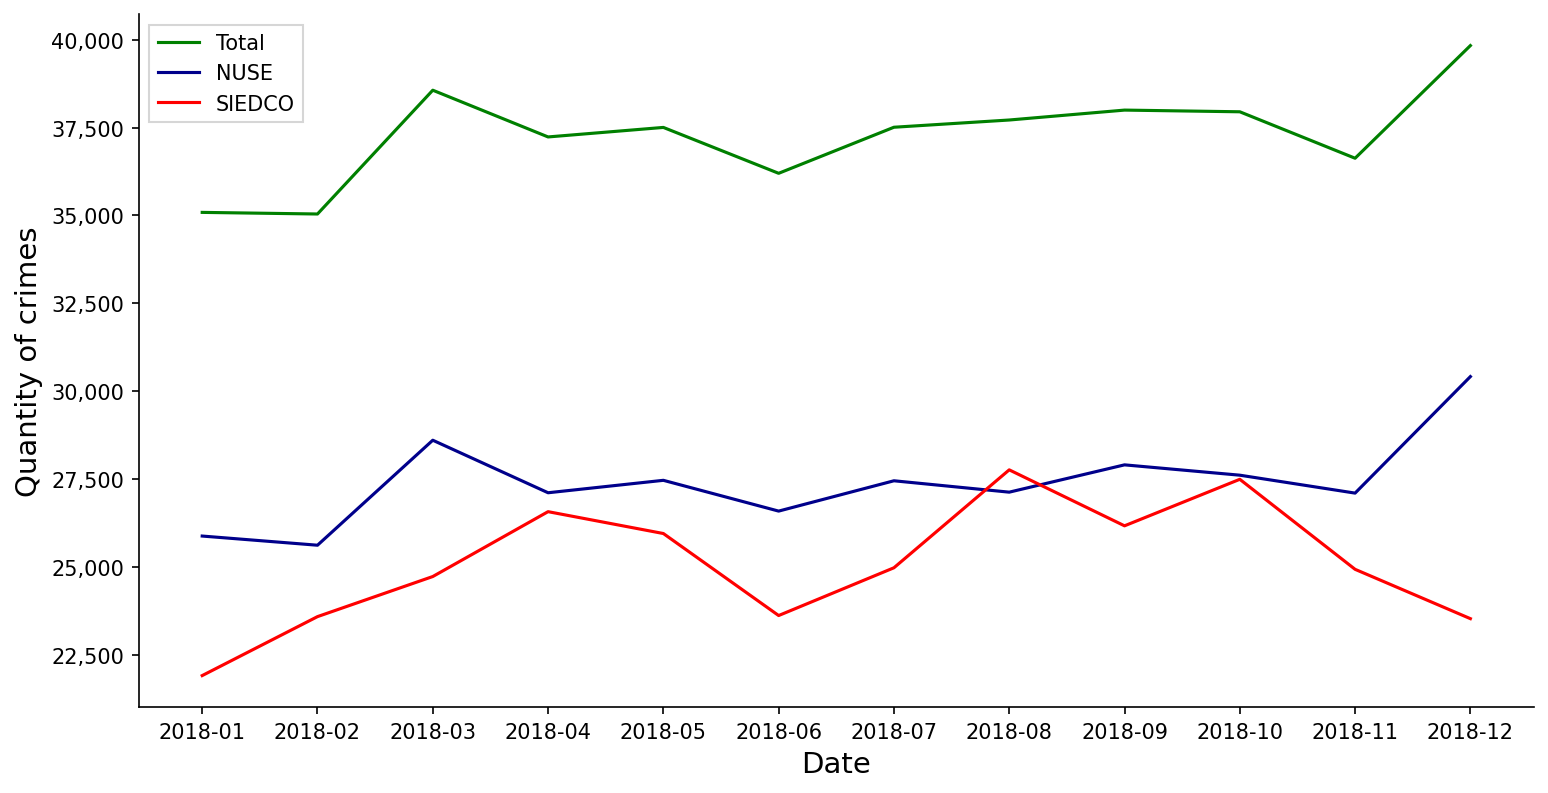

In [25]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)
sns.lineplot(data = total, x = "Año-Mes", y = "N", hue = "BASE", palette = ["green", "darkblue", "red"], ax = ax)
sns.despine()
ax.yaxis.set_major_formatter("{x:0,.0f}")
plt.xlabel("Date", fontsize=14);
plt.ylabel("Quantity of crimes", fontsize=14);
ax.legend(fancybox = False, shadow = False)
# plt.title("Unique crimes by source of information");
plt.savefig(fname = '../../Outputs/Figures/figure_9_unique_crimes_by_source_of_information.png')

In [ ]:
# End of the code